#  Equipe :
### TINA Djara Olivier
### DJOSSOU Djidjoho Isidore Borel

## Data discovery

In [ ]:
# Import libraries
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from os import access

In [ ]:
# Load the Pima Indians dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
feature_names = names[:8]
data = pd.read_csv(url, names=names)

In [ ]:
# View the 5 first instances
data[:5]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def show_num_inst(data):
  # Compter le nombre d'instances pour chaque classe
  class_counts = data['class'].value_counts()

  # Définir les étiquettes et les valeurs pour le graph
  labels = class_counts.index
  values = class_counts.values

  # Configurer et afficher le graph
  plt.bar(labels, values)
  plt.xlabel('Class')
  plt.ylabel('Count')
  plt.title('Number of Instances per Class')
  plt.show()

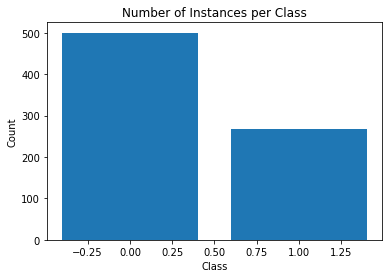

In [ ]:
show_num_inst(data)

In [ ]:
#Splitting the data into dependent and independent variables
X = data.drop("class", axis=1)
Y =  data["class"]

In [ ]:
#Question 1 : Afficher les attributs et la variable cible
"""EDIT here"""
# Les variables explicatives
print(X)
# la variables expliquées
print(Y)

     preg  plas  pres  skin  test  mass   pedi  age
0       6   148    72    35     0  33.6  0.627   50
1       1    85    66    29     0  26.6  0.351   31
2       8   183    64     0     0  23.3  0.672   32
3       1    89    66    23    94  28.1  0.167   21
4       0   137    40    35   168  43.1  2.288   33
..    ...   ...   ...   ...   ...   ...    ...  ...
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
766     1   126    60     0     0  30.1  0.349   47
767     1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64


In [ ]:
def plot_input(X,Y,title=""):
  # Convert the data from numpy array to a pandas dataframe
  df_ros = pd.DataFrame({'age': X["age"], 'pres': X["pres"], 'target': Y})
  # Plot the chart
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x = 'age', y = 'pres', hue = 'target', data = df_ros)
  plt.title(title)

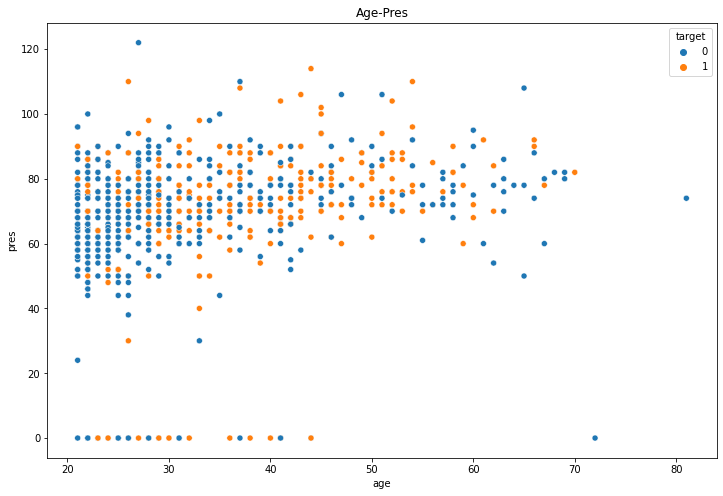

In [ ]:
plot_input(X,Y, "Age-Pres")

In [ ]:
#Question 2 : Afficher le graphe précedent en utilisant des attributs différents
"""EDIT here"""
def plot_input_1(X,Y,A,B,title=""):
  # Convert the data from numpy array to a pandas dataframe
  df_ros = pd.DataFrame({A: X[A], B: X[B], 'target': Y})
  # Plot the chart
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x = A, y = B, hue = 'target', data = df_ros)
  plt.title(title)

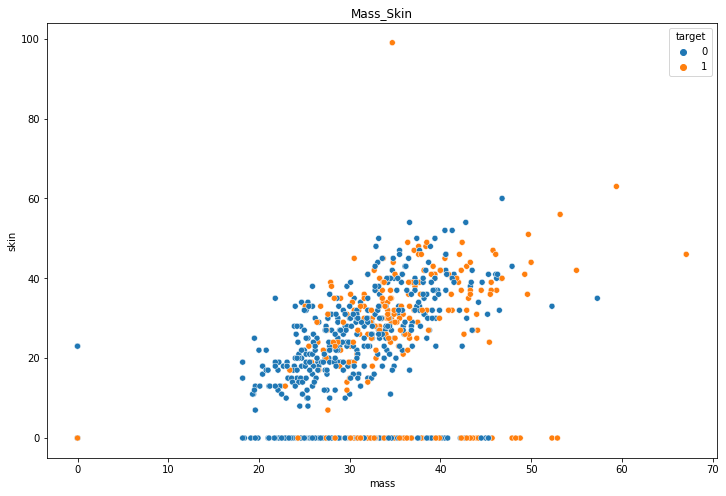

In [ ]:
plot_input_1(X,Y, "mass", "skin", title= "Mass_Skin")

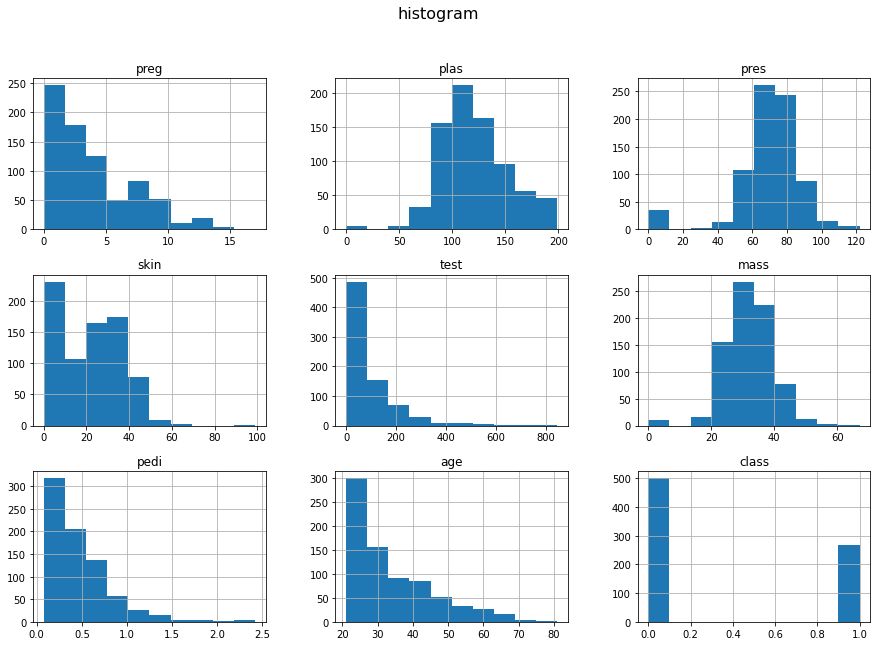

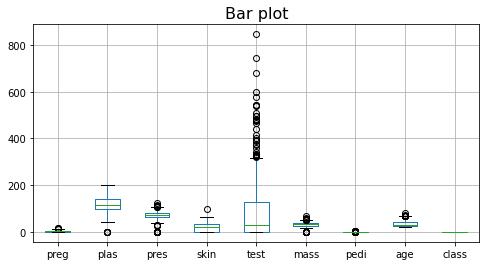

In [ ]:
#histogramms 
data.hist(figsize=(15,10))
plt.suptitle("histogram", fontsize=16)
plt.show()
#boxplot
data.boxplot(figsize=(8,4))
plt.title("Bar plot", fontsize=16)
plt.show()

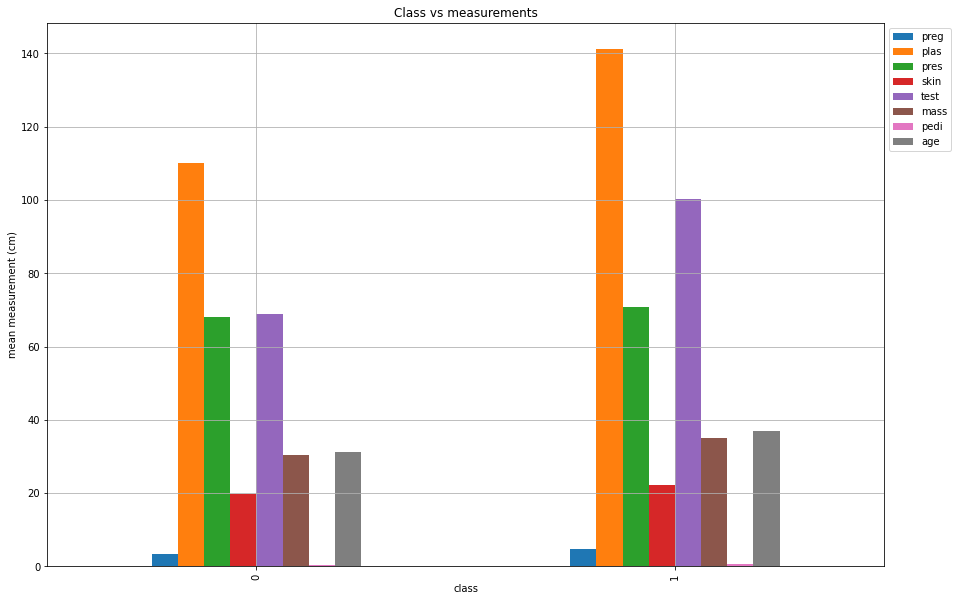

In [ ]:
data.groupby(by = "class").mean()
data.groupby(by="class").mean().plot(kind="bar", figsize=(15,10))
plt.title('Class vs measurements')
plt.ylabel('mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [ ]:
# Transformation des données
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#check transformations
print(X[0:5,:])

#Save new dataset
df = pd.DataFrame(X, columns = feature_names)
X = pd.DataFrame(X,  columns = feature_names)
df["class"]=Y

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


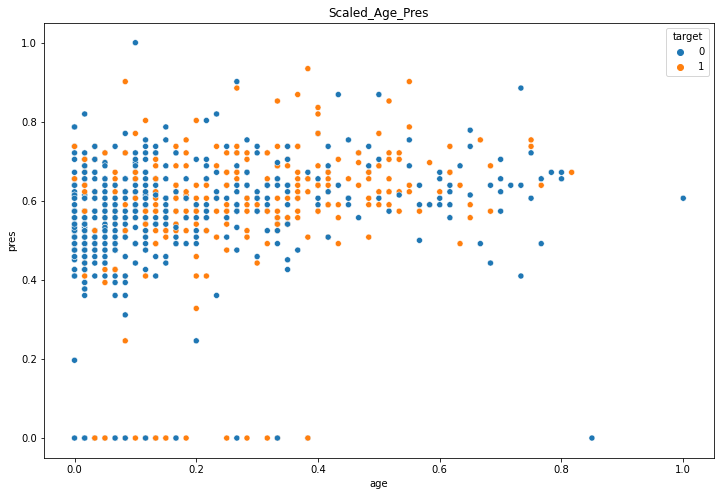

In [ ]:
#Question 3 : Afficher le graphe de la Figure 5 et 6 après la normalisation
"""EDIT here"""
plot_input_1(X,Y, "age", "pres", title= "Scaled_Age_Pres")

In [ ]:
# Equilibrage des données
from imblearn.under_sampling import RandomUnderSampler
y = df["class"]
rus = RandomUnderSampler()
X1, y1 = rus.fit_resample(X, Y)
data1 = pd.DataFrame(X1)
data1["class"] = y1

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X2, y2 = ros.fit_resample(X, Y)
data2 = pd.DataFrame(X2)
data2["class"] = y2

In [ ]:
from  imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=3)
X3, y3 = oversample.fit_resample(X, Y)
data3 = pd.DataFrame(X3)
data3["class"] = y3

Dataset after the Random_Under_Sampling


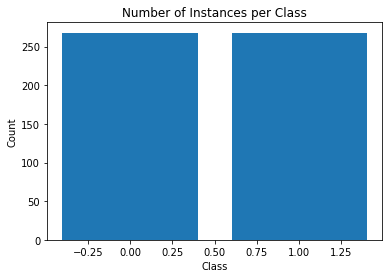

Dataset after the Random_Over_Sampling


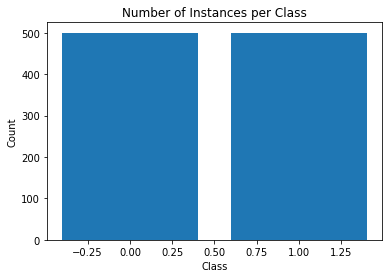

Dataset after the SMOTE_Over_Sampling


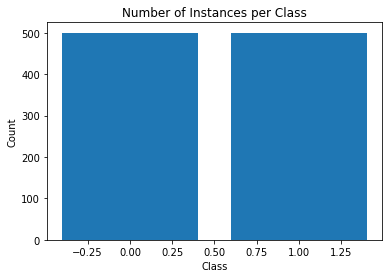

In [ ]:
#Question 4 : Afficher le graphe de la Figure 3 pour voir le nombre d'instances de chaque classe pour chaque méthode

"""EDIT here"""
print("Dataset after the Random_Under_Sampling")
show_num_inst(data1)
print("Dataset after the Random_Over_Sampling")
show_num_inst(data2)
print("Dataset after the SMOTE_Over_Sampling")
show_num_inst(data3)

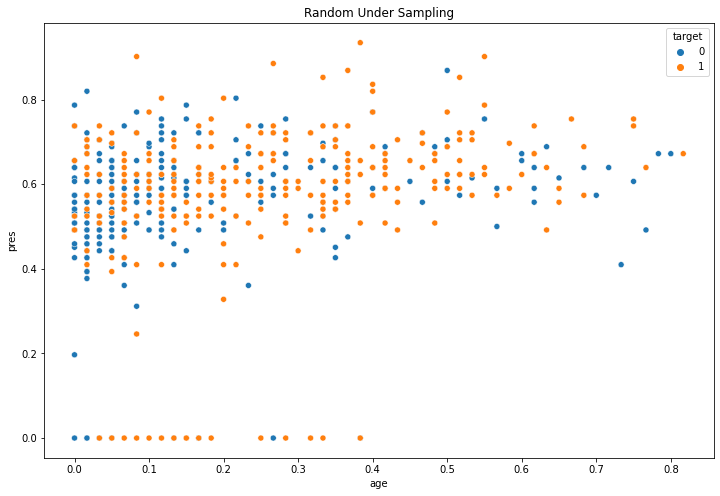

In [ ]:
plot_input(X1,y1,'Random Under Sampling')

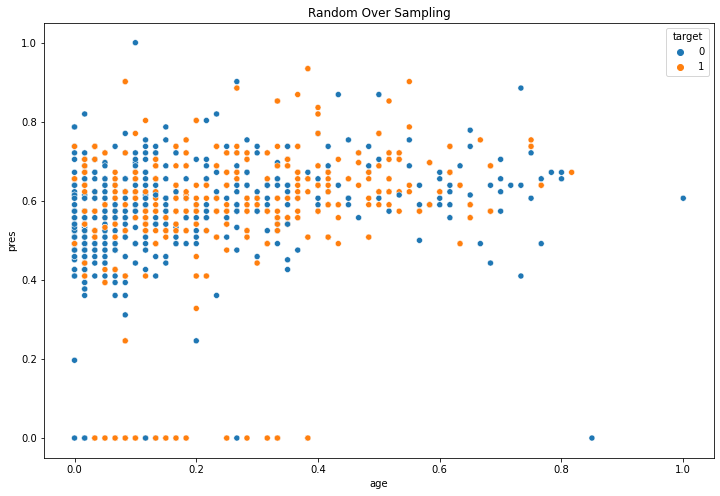

In [ ]:
plot_input(X2,y2,'Random Over Sampling')

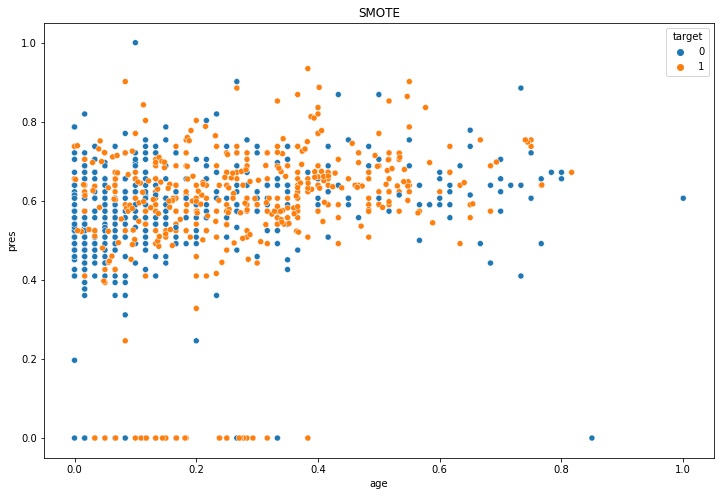

In [ ]:
plot_input(X3,y3,'SMOTE')

# Random Under Sampling

## Filters

In [ ]:
X1 = X1.drop(['class'], axis = 1)

In [ ]:
X1

,preg,plas,pres,skin,test,mass,pedi,age
0,0.176471,0.517588,0.590164,0.303030,0.179669,0.411326,0.278395,0.100000
1,0.058824,0.532663,0.622951,0.000000,0.000000,0.558867,0.050811,0.083333
2,0.235294,0.738693,0.606557,0.252525,0.346336,0.520119,0.131085,0.150000
3,0.352941,0.834171,0.606557,0.000000,0.000000,0.396423,0.096499,0.750000
4,0.058824,0.824121,0.672131,0.434343,0.079196,0.488823,0.112297,0.483333
...,...,...,...,...,...,...,...,...
531,0.058824,0.643216,0.721311,0.393939,0.130024,0.543964,0.418019,0.266667
532,0.000000,0.618090,0.590164,0.000000,0.000000,0.540984,0.076857,0.516667
533,0.352941,0.954774,0.754098,0.000000,0.000000,0.529061,0.085397,0.750000
534,0.529412,0.854271,0.606557,0.313131,0.000000,0.655738,0.138770,0.366667


In [ ]:
# Features extraction Using Information Gain
MI_score = mutual_info_classif(X1, y1, random_state=0)
for feature in zip(feature_names, MI_score):
  print(feature)

('preg', 0.047926718657662626)
('plas', 0.13391296292020005)
('pres', 0.020454764336498732)
('skin', 0.011128829157870612)
('test', 0.07681532698465121)
('mass', 0.096465294870689)
('pedi', 0.01852672472051964)
('age', 0.023577727761754153)


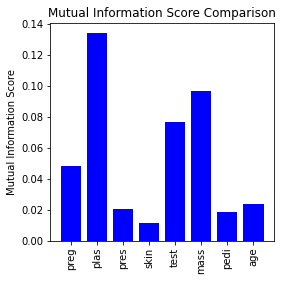

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

In [ ]:
fs = SelectKBest(score_func=mutual_info_classif, k=4)
X_new_MIC_1 = fs.fit_transform(X1,y1)
print(X_new_MIC_1.shape)
print(fs.scores_)
print(fs.feature_names_in_)
X_new_MIC_1

(536, 4)
[0.025 0.126 0.    0.    0.075 0.095 0.031 0.081]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


array([[0.518, 0.18 , 0.411, 0.1  ],
       [0.533, 0.   , 0.559, 0.083],
       [0.739, 0.346, 0.52 , 0.15 ],
       ...,
       [0.955, 0.   , 0.529, 0.75 ],
       [0.854, 0.   , 0.656, 0.367],
       [0.633, 0.   , 0.449, 0.433]])

Les variables retenues: plas, mass, preg, test

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_MIC_1, y1, test_size=0.3, random_state=42)

In [ ]:
def k_nn(X_train, X_test, y_train, y_test):
  table_acc =[]
  tab_index = []
  for i in range (3,50):
    clf =  KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    table_acc.append(acc)
    tab_index.append(i)

  Dict_acc= {a:b for a, b in zip(tab_index, table_acc)}
  max_acc = max(Dict_acc.values())
  for key, value in Dict_acc.items():
    if value == max_acc:
      print('Accuracy:', value)
      print('Nombre de points:', key)
      ##
      clf =  KNeighborsClassifier(n_neighbors=key)
      clf.fit(X_train, y_train)
      y_pred= clf.predict(X_test)
      ##

  print('Classification report')
  print(classification_report(y_test, y_pred))

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.7577639751552795
Nombre de points: 17
Classification report
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        76
           1       0.81      0.71      0.75        85

    accuracy                           0.76       161
   macro avg       0.76      0.76      0.76       161
weighted avg       0.76      0.76      0.76       161



In [ ]:
#Grid search  
def grid_Search(X_new, Y):
  Knn2 = KNeighborsClassifier() 
  grid_param={'n_neighbors': range(3,50),
  'weights' : ['uniform', 'distance'], 
  'metric' : ['euclidean', 'manhattan', 'minkowski']} 
  grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy')
  grid.fit(X_new,Y)
  k = grid.best_score_
  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
 ##
  clf =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
  clf.fit(X_train, y_train)
  y_pred= clf.predict(X_test)
  print('Classification report')
  print(classification_report(y_test, y_pred))
 ##

In [ ]:
grid_Search(X_new_MIC_1, y1)

0.7634171907756814
{'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=43)
Classification report
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        76
           1       0.78      0.68      0.73        85

    accuracy                           0.73       161
   macro avg       0.74      0.74      0.73       161
weighted avg       0.74      0.73      0.73       161



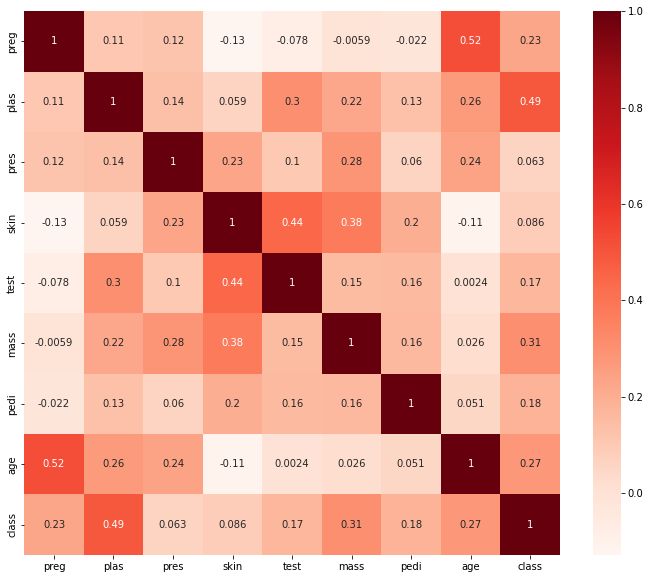

In [ ]:
# Features extraction Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.20]
relevant_features

preg     0.225788
plas     0.490199
mass     0.306917
age      0.273484
class    1.000000
Name: class, dtype: float64

In [ ]:
X_new_Cor_1 = X1.drop(columns = ['pres','skin','test','pedi'])
X_new_Cor_1

,preg,plas,mass,age
0,0.176471,0.517588,0.411326,0.100000
1,0.058824,0.532663,0.558867,0.083333
2,0.235294,0.738693,0.520119,0.150000
3,0.352941,0.834171,0.396423,0.750000
4,0.058824,0.824121,0.488823,0.483333
...,...,...,...,...
531,0.058824,0.643216,0.543964,0.266667
532,0.000000,0.618090,0.540984,0.516667
533,0.352941,0.954774,0.529061,0.750000
534,0.529412,0.854271,0.655738,0.366667


In [ ]:
print(X_new_Cor_1.corr())

          preg      plas      mass       age
preg  1.000000  0.108922 -0.005863  0.523903
plas  0.108922  1.000000  0.221333  0.264011
mass -0.005863  0.221333  1.000000  0.025654
age   0.523903  0.264011  0.025654  1.000000


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_Cor_1, y1, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.7870370370370371
Nombre de points: 44
Classification report
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        59
           1       0.72      0.88      0.79        49

    accuracy                           0.79       108
   macro avg       0.80      0.79      0.79       108
weighted avg       0.80      0.79      0.79       108



In [ ]:
grid_Search(X_new_Cor_1, y1)

0.7690775681341719
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=20)
Classification report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        59
           1       0.70      0.80      0.74        49

    accuracy                           0.75       108
   macro avg       0.75      0.75      0.75       108
weighted avg       0.76      0.75      0.75       108



In [ ]:
# Use SelectKBest to select the best features based on univariate test results
selector = SelectKBest(k=4)
X_new_SKB_1 = selector.fit_transform(X1, y1)
print(X_new_SKB_1.shape)
print(selector.scores_)
print(selector.feature_names_in_)
X_new_SKB_1

(536, 4)
[ 28.686 168.904   2.095   3.992  15.894  55.533  18.429  43.168]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


array([[0.176, 0.518, 0.411, 0.1  ],
       [0.059, 0.533, 0.559, 0.083],
       [0.235, 0.739, 0.52 , 0.15 ],
       ...,
       [0.353, 0.955, 0.529, 0.75 ],
       [0.529, 0.854, 0.656, 0.367],
       [0.059, 0.633, 0.449, 0.433]])

Les variables retenues: plas, mass, age, preg

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_SKB_1, y1, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.7870370370370371
Nombre de points: 44
Classification report
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        59
           1       0.72      0.88      0.79        49

    accuracy                           0.79       108
   macro avg       0.80      0.79      0.79       108
weighted avg       0.80      0.79      0.79       108



In [ ]:
grid_Search(X_new_SKB_1, y1)

0.7690775681341719
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=20)
Classification report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        59
           1       0.70      0.80      0.74        49

    accuracy                           0.75       108
   macro avg       0.75      0.75      0.75       108
weighted avg       0.76      0.75      0.75       108



## Wrappers

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
# Initialize the Random Forest Classifier
def sfs_func(X,Y,k):
  clf = RandomForestClassifier(random_state = 0)

  # Initialize the Sequential Feature Selector
  sfs = SFS(clf, 
            k_features=k, 
            forward=True, 
            floating=False, 
            scoring='accuracy',
            cv=5)

  # Fit the SFS to the data
  sfs = sfs.fit(X, Y,custom_feature_names=feature_names)

  # Get the selected features
  selected_features = list(sfs.k_feature_idx_)
  print("Selected features:", selected_features)
  print(sfs.subsets_)

In [ ]:
# Appel de la fonction sfs
sfs_func(X1, y1, 4)

Selected features: [0, 1, 2, 5]
{1: {'feature_idx': (1,), 'cv_scores': array([0.648, 0.598, 0.748, 0.664, 0.682]), 'avg_score': 0.6679473866389755, 'feature_names': ('plas',)}, 2: {'feature_idx': (1, 5), 'cv_scores': array([0.704, 0.71 , 0.71 , 0.766, 0.673]), 'avg_score': 0.7127033575631707, 'feature_names': ('plas', 'mass')}, 3: {'feature_idx': (0, 1, 5), 'cv_scores': array([0.731, 0.72 , 0.729, 0.748, 0.776]), 'avg_score': 0.7406888196607823, 'feature_names': ('preg', 'plas', 'mass')}, 4: {'feature_idx': (0, 1, 2, 5), 'cv_scores': array([0.731, 0.729, 0.71 , 0.766, 0.738]), 'avg_score': 0.7350813430252682, 'feature_names': ('preg', 'plas', 'pres', 'mass')}}


In [ ]:
X_new_SFS_1 = X1.drop(columns = ['pres','skin','test','preg'])
X_new_SFS_1

,plas,mass,pedi,age
0,0.517588,0.411326,0.278395,0.100000
1,0.532663,0.558867,0.050811,0.083333
2,0.738693,0.520119,0.131085,0.150000
3,0.834171,0.396423,0.096499,0.750000
4,0.824121,0.488823,0.112297,0.483333
...,...,...,...,...
531,0.643216,0.543964,0.418019,0.266667
532,0.618090,0.540984,0.076857,0.516667
533,0.954774,0.529061,0.085397,0.750000
534,0.854271,0.655738,0.138770,0.366667


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_new_SFS_1, y1, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.8148148148148148
Nombre de points: 17
Classification report
              precision    recall  f1-score   support

           0       0.90      0.75      0.81        59
           1       0.75      0.90      0.81        49

    accuracy                           0.81       108
   macro avg       0.82      0.82      0.81       108
weighted avg       0.83      0.81      0.81       108



In [ ]:
grid_Search(X_new_SFS_1, y1)

0.7650593990216632
{'metric': 'manhattan', 'n_neighbors': 46, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=46)
Classification report
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        59
           1       0.68      0.84      0.75        49

    accuracy                           0.75       108
   macro avg       0.76      0.76      0.75       108
weighted avg       0.77      0.75      0.75       108



In [ ]:
def efs_func(X,Y):
  lg = LogisticRegression(random_state=0)
  efs = EFS(estimator=lg, # The Ml model
  min_features=1, 
  max_features=4, 
  scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
  cv=5) 
  efs = efs.fit(X1, y1)
  print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
  print('Best subset (corresponding names):', efs.best_feature_names_) 

In [ ]:
# Appel de la fonction efs
efs_func(X1, y1)

Features: 162/162

Best accuracy score: 0.76
Best subset (corresponding names): ('preg', 'plas', 'mass', 'pedi')


In [ ]:
X_new_EFS_1 = X1.drop(columns = ['skin','age', 'test', 'pres'])
X_new_EFS_1

,preg,plas,mass,pedi
0,0.176471,0.517588,0.411326,0.278395
1,0.058824,0.532663,0.558867,0.050811
2,0.235294,0.738693,0.520119,0.131085
3,0.352941,0.834171,0.396423,0.096499
4,0.058824,0.824121,0.488823,0.112297
...,...,...,...,...
531,0.058824,0.643216,0.543964,0.418019
532,0.000000,0.618090,0.540984,0.076857
533,0.352941,0.954774,0.529061,0.085397
534,0.529412,0.854271,0.655738,0.138770


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_new_EFS_1, y1, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.7592592592592593
Nombre de points: 8
Classification report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        59
           1       0.73      0.73      0.73        49

    accuracy                           0.76       108
   macro avg       0.76      0.76      0.76       108
weighted avg       0.76      0.76      0.76       108



In [ ]:
grid_Search(X_new_EFS_1, y1)

0.7597134870719776
{'metric': 'manhattan', 'n_neighbors': 49, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=49)
Classification report
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        59
           1       0.68      0.78      0.72        49

    accuracy                           0.73       108
   macro avg       0.73      0.74      0.73       108
weighted avg       0.74      0.73      0.73       108



## Over sampling

### Filters

In [ ]:
X2 = X2.drop(['class'], axis = 1)
X2

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
995,0.117647,0.502513,0.540984,0.202020,0.106383,0.490313,0.336892,0.116667
996,0.294118,0.834171,0.622951,0.000000,0.000000,0.681073,0.111870,0.100000
997,0.470588,0.778894,0.508197,0.262626,0.585106,0.506706,0.198548,0.416667
998,0.000000,0.904523,0.737705,0.262626,0.106383,0.543964,0.100769,0.233333


In [ ]:
y2

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: class, Length: 1000, dtype: int64

In [ ]:
# Features extraction Using Information Gain
MI_score = mutual_info_classif(X2, y2, random_state=0)
for feature in zip(feature_names, MI_score):
  print(feature)

('preg', 0.042189759190491616)
('plas', 0.1796634839187483)
('pres', 0.01459514030346809)
('skin', 0.023596188683322916)
('test', 0.06563564026720048)
('mass', 0.13460100398246877)
('pedi', 0.11642429571061652)
('age', 0.06957846033448223)


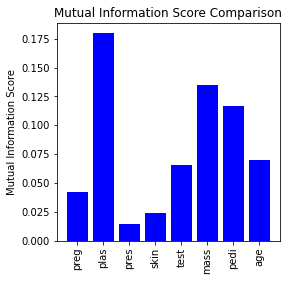

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

In [ ]:
fs = SelectKBest(score_func=mutual_info_classif, k=5)
X_new_MIC_2 = fs.fit_transform(X2,y2)
print(X_new_MIC_2.shape)
print(fs.scores_)
print(fs.feature_names_in_)
X_new_MIC_2

(1000, 5)
[0.061 0.17  0.047 0.039 0.067 0.131 0.109 0.067]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


array([[0.744, 0.   , 0.501, 0.234, 0.483],
       [0.427, 0.   , 0.396, 0.117, 0.167],
       [0.92 , 0.   , 0.347, 0.254, 0.183],
       ...,
       [0.779, 0.585, 0.507, 0.199, 0.417],
       [0.905, 0.106, 0.544, 0.101, 0.233],
       [0.578, 0.   , 0.502, 0.071, 0.317]])

In [ ]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_new_MIC_2, y2, test_size = 0.2, random_state= 42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.76
Nombre de points: 7
Accuracy: 0.76
Nombre de points: 9
Classification report
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        99
           1       0.76      0.77      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [ ]:
grid_Search(X_new_MIC_2, y2)

0.8550000000000001
{'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_neighbors=40, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        99
           1       0.75      0.70      0.72       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



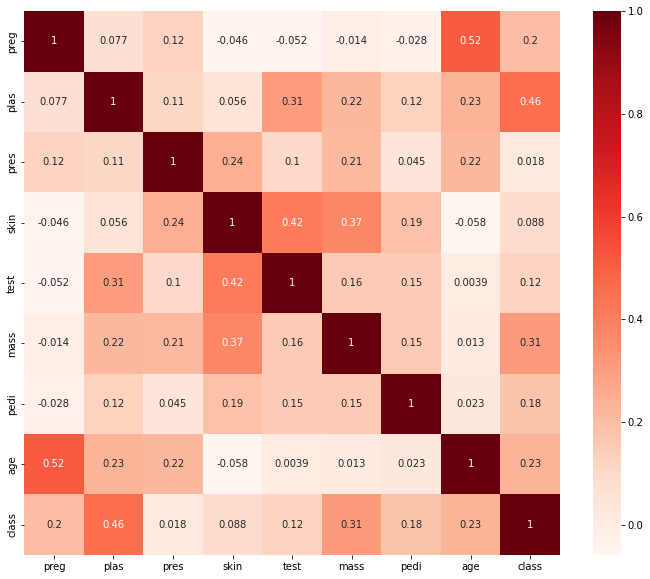

In [ ]:
# Features extraction Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

preg     0.201187
plas     0.455704
mass     0.311912
pedi     0.178631
age      0.229823
class    1.000000
Name: class, dtype: float64

In [ ]:
X_new_Cor_2 = X2.drop(columns = ['pres','skin','test'])
X_new_Cor_2

,preg,plas,mass,pedi,age
0,0.352941,0.743719,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.642325,0.943638,0.200000
...,...,...,...,...,...
995,0.117647,0.502513,0.490313,0.336892,0.116667
996,0.294118,0.834171,0.681073,0.111870,0.100000
997,0.470588,0.778894,0.506706,0.198548,0.416667
998,0.000000,0.904523,0.543964,0.100769,0.233333


In [ ]:
print(X_new_Cor_2.corr())

          preg      plas      mass      pedi       age
preg  1.000000  0.076982 -0.014159 -0.028278  0.515003
plas  0.076982  1.000000  0.217652  0.123809  0.233105
mass -0.014159  0.217652  1.000000  0.152885  0.013451
pedi -0.028278  0.123809  0.152885  1.000000  0.023360
age   0.515003  0.233105  0.013451  0.023360  1.000000


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_Cor_2, y2, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.77
Nombre de points: 3
Accuracy: 0.77
Nombre de points: 6
Classification report
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        99
           1       0.78      0.76      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [ ]:
grid_Search(X_new_Cor_2, y2)

0.852
{'metric': 'manhattan', 'n_neighbors': 47, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=47, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        99
           1       0.73      0.73      0.73       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [ ]:
# Use SelectKBest to select the best features based on univariate test results
selector = SelectKBest(k=5)
X_new_SKB_2 = selector.fit_transform(X2, y2)
print(X_new_SKB_2.shape)
print(selector.scores_)
print(selector.feature_names_in_)
X_new_SKB_2

(1000, 5)
[ 42.099 261.57    0.332   7.723  13.811 107.559  32.895  55.653]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


array([[0.353, 0.744, 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.347, 0.254, 0.183],
       ...,
       [0.471, 0.779, 0.507, 0.199, 0.417],
       [0.   , 0.905, 0.544, 0.101, 0.233],
       [0.353, 0.578, 0.502, 0.071, 0.317]])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_SKB_2, y2, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.77
Nombre de points: 3
Accuracy: 0.77
Nombre de points: 6
Classification report
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        99
           1       0.78      0.76      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [ ]:
grid_Search(X_new_SKB_2, y2)

0.852
{'metric': 'manhattan', 'n_neighbors': 47, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=47, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        99
           1       0.73      0.73      0.73       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



### Wrappers

In [ ]:
sfs_func(X2, y2, 5)

Selected features: [0, 1, 2, 5, 7]
{1: {'feature_idx': (1,), 'cv_scores': array([0.705, 0.65 , 0.715, 0.75 , 0.755]), 'avg_score': 0.715, 'feature_names': ('plas',)}, 2: {'feature_idx': (1, 5), 'cv_scores': array([0.815, 0.81 , 0.81 , 0.89 , 0.88 ]), 'avg_score': 0.841, 'feature_names': ('plas', 'mass')}, 3: {'feature_idx': (1, 5, 7), 'cv_scores': array([0.81 , 0.81 , 0.87 , 0.905, 0.87 ]), 'avg_score': 0.8530000000000001, 'feature_names': ('plas', 'mass', 'age')}, 4: {'feature_idx': (0, 1, 5, 7), 'cv_scores': array([0.83, 0.81, 0.87, 0.92, 0.88]), 'avg_score': 0.8620000000000001, 'feature_names': ('preg', 'plas', 'mass', 'age')}, 5: {'feature_idx': (0, 1, 2, 5, 7), 'cv_scores': array([0.84 , 0.81 , 0.88 , 0.915, 0.91 ]), 'avg_score': 0.8709999999999999, 'feature_names': ('preg', 'plas', 'pres', 'mass', 'age')}}


In [ ]:
X_new_SFS_2 = X2.drop(columns = ['skin','preg', 'pedi'])
X_new_SFS_2

,plas,pres,test,mass,age
0,0.743719,0.590164,0.000000,0.500745,0.483333
1,0.427136,0.540984,0.000000,0.396423,0.166667
2,0.919598,0.524590,0.000000,0.347243,0.183333
3,0.447236,0.540984,0.111111,0.418778,0.000000
4,0.688442,0.327869,0.198582,0.642325,0.200000
...,...,...,...,...,...
995,0.502513,0.540984,0.106383,0.490313,0.116667
996,0.834171,0.622951,0.000000,0.681073,0.100000
997,0.778894,0.508197,0.585106,0.506706,0.416667
998,0.904523,0.737705,0.106383,0.543964,0.233333


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_new_SFS_2, y2, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.765
Nombre de points: 3
Accuracy: 0.765
Nombre de points: 5
Accuracy: 0.765
Nombre de points: 7
Classification report
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.73      0.84      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [ ]:
grid_Search(X_new_SFS_2, y2)

0.8560000000000001
{'metric': 'euclidean', 'n_neighbors': 49, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_neighbors=49, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.71      0.72      0.71        99
           1       0.72      0.71      0.72       101

    accuracy                           0.71       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.72      0.71      0.72       200



In [ ]:
efs_func(X2, y2)

Features: 162/162

Best accuracy score: 0.76
Best subset (corresponding names): ('preg', 'plas', 'mass', 'pedi')


In [ ]:
X_new_EFS_2 = X2.drop(columns = ['pres','skin','test', 'age'])
X_new_EFS_2

,preg,plas,mass,pedi
0,0.352941,0.743719,0.500745,0.234415
1,0.058824,0.427136,0.396423,0.116567
2,0.470588,0.919598,0.347243,0.253629
3,0.058824,0.447236,0.418778,0.038002
4,0.000000,0.688442,0.642325,0.943638
...,...,...,...,...
995,0.117647,0.502513,0.490313,0.336892
996,0.294118,0.834171,0.681073,0.111870
997,0.470588,0.778894,0.506706,0.198548
998,0.000000,0.904523,0.543964,0.100769


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_new_EFS_2, y2, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.76
Nombre de points: 4
Classification report
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        99
           1       0.80      0.70      0.75       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [ ]:
grid_Search(X_new_EFS_2, y2)

0.8480000000000001
{'metric': 'manhattan', 'n_neighbors': 48, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=48, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        99
           1       0.73      0.73      0.73       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



## SMOTE

In [ ]:
X3 = X3.drop(['class'], axis = 1)
X3

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
995,0.352941,0.778517,0.577788,0.000000,0.000000,0.398699,0.042699,0.483333
996,0.150867,0.774700,0.447636,0.361855,0.069457,0.518070,0.202344,0.057254
997,0.040984,0.554123,0.524590,0.359662,0.022942,0.500745,0.194275,0.005054
998,0.494541,0.758794,0.632669,0.331458,0.255567,0.637675,0.196843,0.253393


In [ ]:
# Features extraction Using Information Gain
MI_score = mutual_info_classif(X1, y1, random_state=0)
for feature in zip(feature_names, MI_score):
  print(feature)

('preg', 0.047926718657662626)
('plas', 0.13391296292020005)
('pres', 0.020454764336498732)
('skin', 0.011128829157870612)
('test', 0.07681532698465121)
('mass', 0.096465294870689)
('pedi', 0.01852672472051964)
('age', 0.023577727761754153)


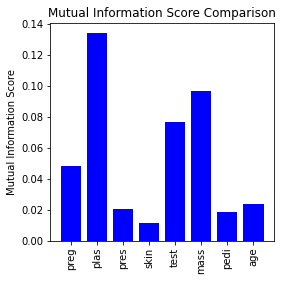

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

In [ ]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
X_new_MIC_3 = fs.fit_transform(X3,y3)
print(X_new_MIC_3.shape)
print(fs.scores_)
print(fs.feature_names_in_)
X_new_MIC_3

(1000, 3)
[0.144 0.177 0.115 0.087 0.043 0.091 0.035 0.174]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


array([[0.353, 0.744, 0.483],
       [0.059, 0.427, 0.167],
       [0.471, 0.92 , 0.183],
       ...,
       [0.041, 0.554, 0.005],
       [0.495, 0.759, 0.253],
       [0.353, 0.781, 0.483]])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_MIC_3, y3, test_size=0.3, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.8066666666666666
Nombre de points: 20
Classification report
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       149
           1       0.78      0.85      0.82       151

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [ ]:
grid_Search(X_new_MIC_3, y3)

0.8019999999999999
{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_neighbors=23, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       149
           1       0.75      0.85      0.80       151

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



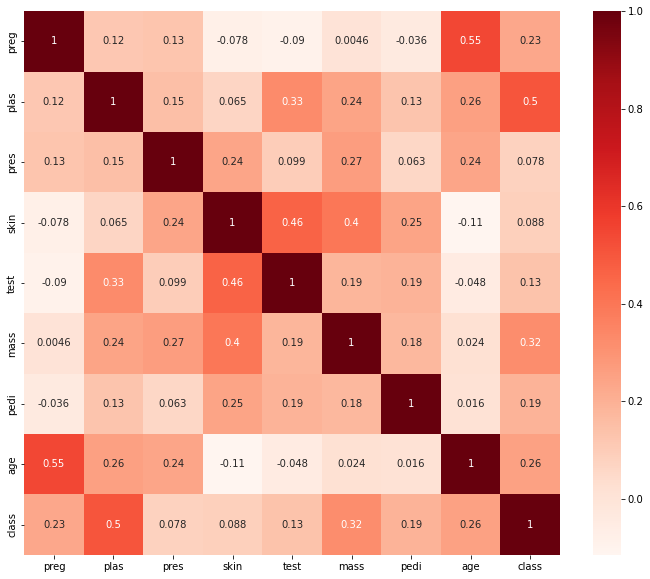

In [ ]:
# Features extraction Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
relevant_features

preg     0.229993
plas     0.504847
test     0.134568
mass     0.323035
pedi     0.191561
age      0.255181
class    1.000000
Name: class, dtype: float64

In [ ]:
X_new_Cor_3 = X3.drop(columns = ['pres','skin'])
X_new_Cor_3

,preg,plas,test,mass,pedi,age
0,0.352941,0.743719,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...
995,0.352941,0.778517,0.000000,0.398699,0.042699,0.483333
996,0.150867,0.774700,0.069457,0.518070,0.202344,0.057254
997,0.040984,0.554123,0.022942,0.500745,0.194275,0.005054
998,0.494541,0.758794,0.255567,0.637675,0.196843,0.253393


In [ ]:
print(X_new_Cor_3.corr())

          preg      plas      test      mass      pedi       age
preg  1.000000  0.119089 -0.089570  0.004600 -0.036447  0.546085
plas  0.119089  1.000000  0.325695  0.243407  0.131265  0.257409
test -0.089570  0.325695  1.000000  0.185892  0.194171 -0.048307
mass  0.004600  0.243407  0.185892  1.000000  0.175133  0.024380
pedi -0.036447  0.131265  0.194171  0.175133  1.000000  0.016066
age   0.546085  0.257409 -0.048307  0.024380  0.016066  1.000000


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_Cor_3, y3, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.81
Nombre de points: 15
Classification report
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        99
           1       0.78      0.87      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
grid_Search(X_new_Cor_3, y3)

0.8240000000000001
{'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.78      0.83      0.80       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



In [ ]:
# Use SelectKBest to select the best features based on univariate test results
selector = SelectKBest(k=4)
X_new_SKB_3 = selector.fit_transform(X3, y3)
print(X_new_SKB_3.shape)
print(selector.scores_)
print(selector.feature_names_in_)
X_new_SKB_3

(1000, 4)
[ 55.739 341.364   6.156   7.752  18.406 116.276  38.017  69.513]
['preg' 'plas' 'pres' 'skin' 'test' 'mass' 'pedi' 'age']


array([[0.353, 0.744, 0.501, 0.483],
       [0.059, 0.427, 0.396, 0.167],
       [0.471, 0.92 , 0.347, 0.183],
       ...,
       [0.041, 0.554, 0.501, 0.005],
       [0.495, 0.759, 0.638, 0.253],
       [0.353, 0.781, 0.396, 0.483]])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_SKB_3, y3, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.8
Nombre de points: 7
Accuracy: 0.8
Nombre de points: 11
Classification report
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.78      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
grid_Search(X_new_SKB_3, y3)

0.8069999999999998
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.80      0.77      0.78       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



In [ ]:
sfs_func(X3, y3, 5)

Selected features: [1, 2, 5, 6, 7]
{1: {'feature_idx': (1,), 'cv_scores': array([0.65 , 0.635, 0.74 , 0.795, 0.745]), 'avg_score': 0.7130000000000001, 'feature_names': ('plas',)}, 2: {'feature_idx': (1, 5), 'cv_scores': array([0.72, 0.7 , 0.75, 0.8 , 0.73]), 'avg_score': 0.74, 'feature_names': ('plas', 'mass')}, 3: {'feature_idx': (1, 5, 7), 'cv_scores': array([0.725, 0.695, 0.815, 0.84 , 0.835]), 'avg_score': 0.7819999999999999, 'feature_names': ('plas', 'mass', 'age')}, 4: {'feature_idx': (1, 2, 5, 7), 'cv_scores': array([0.755, 0.735, 0.8  , 0.875, 0.845]), 'avg_score': 0.8019999999999999, 'feature_names': ('plas', 'pres', 'mass', 'age')}, 5: {'feature_idx': (1, 2, 5, 6, 7), 'cv_scores': array([0.78 , 0.705, 0.81 , 0.905, 0.85 ]), 'avg_score': 0.8099999999999999, 'feature_names': ('plas', 'pres', 'mass', 'pedi', 'age')}}


In [ ]:
X_new_SFS_3 = X3.drop(columns = ['pedi','skin','test'])
X_new_SFS_3

,preg,plas,pres,mass,age
0,0.352941,0.743719,0.590164,0.500745,0.483333
1,0.058824,0.427136,0.540984,0.396423,0.166667
2,0.470588,0.919598,0.524590,0.347243,0.183333
3,0.058824,0.447236,0.540984,0.418778,0.000000
4,0.000000,0.688442,0.327869,0.642325,0.200000
...,...,...,...,...,...
995,0.352941,0.778517,0.577788,0.398699,0.483333
996,0.150867,0.774700,0.447636,0.518070,0.057254
997,0.040984,0.554123,0.524590,0.500745,0.005054
998,0.494541,0.758794,0.632669,0.637675,0.253393


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_new_SFS_3, y3, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.785
Nombre de points: 10
Classification report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.76      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [ ]:
grid_Search(X_new_SFS_3, y3)

0.806
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.80      0.68      0.73        99
           1       0.72      0.83      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [ ]:
# EFS
efs_func(X3, y3)

Features: 162/162

Best accuracy score: 0.76
Best subset (corresponding names): ('preg', 'plas', 'mass', 'pedi')


In [ ]:
X_new_EFS_3 = X3.drop(columns = ['pres','skin','test', 'age'])
X_new_EFS_3

,preg,plas,mass,pedi
0,0.352941,0.743719,0.500745,0.234415
1,0.058824,0.427136,0.396423,0.116567
2,0.470588,0.919598,0.347243,0.253629
3,0.058824,0.447236,0.418778,0.038002
4,0.000000,0.688442,0.642325,0.943638
...,...,...,...,...
995,0.352941,0.778517,0.398699,0.042699
996,0.150867,0.774700,0.518070,0.202344
997,0.040984,0.554123,0.500745,0.194275
998,0.494541,0.758794,0.637675,0.196843


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_new_EFS_3, y3, test_size=0.2, random_state=42)

In [ ]:
k_nn(X_train, X_test, y_train, y_test)

Accuracy: 0.805
Nombre de points: 25
Classification report
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        99
           1       0.77      0.88      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [ ]:
grid_Search(X_new_EFS_3, y3)

0.8089999999999999
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
Classification report
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.79      0.79      0.79       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



# Decision tree

### Under Sampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 24)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split= 20)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc2)
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy: 0.7407407407407407
Classification report
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        52
           1       0.76      0.73      0.75        56

    accuracy                           0.74       108
   macro avg       0.74      0.74      0.74       108
weighted avg       0.74      0.74      0.74       108



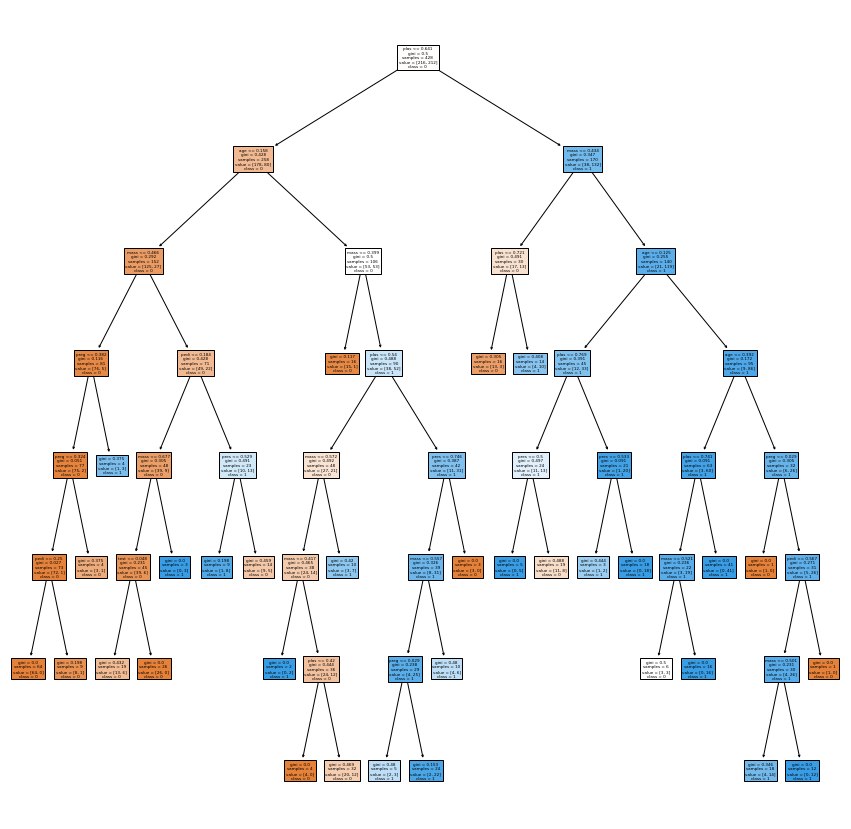

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

In [ ]:
#Grid search 
DT = tree.DecisionTreeClassifier(random_state = 42)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DT, params, cv = 10, scoring = 'accuracy')
grid.fit(X1,y1)
y_pred = grid.predict(X_test)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print('Acc:', accuracy_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred))

0.7481481481481481
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)
Acc: 0.76
Classification report
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        99
           1       0.76      0.76      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



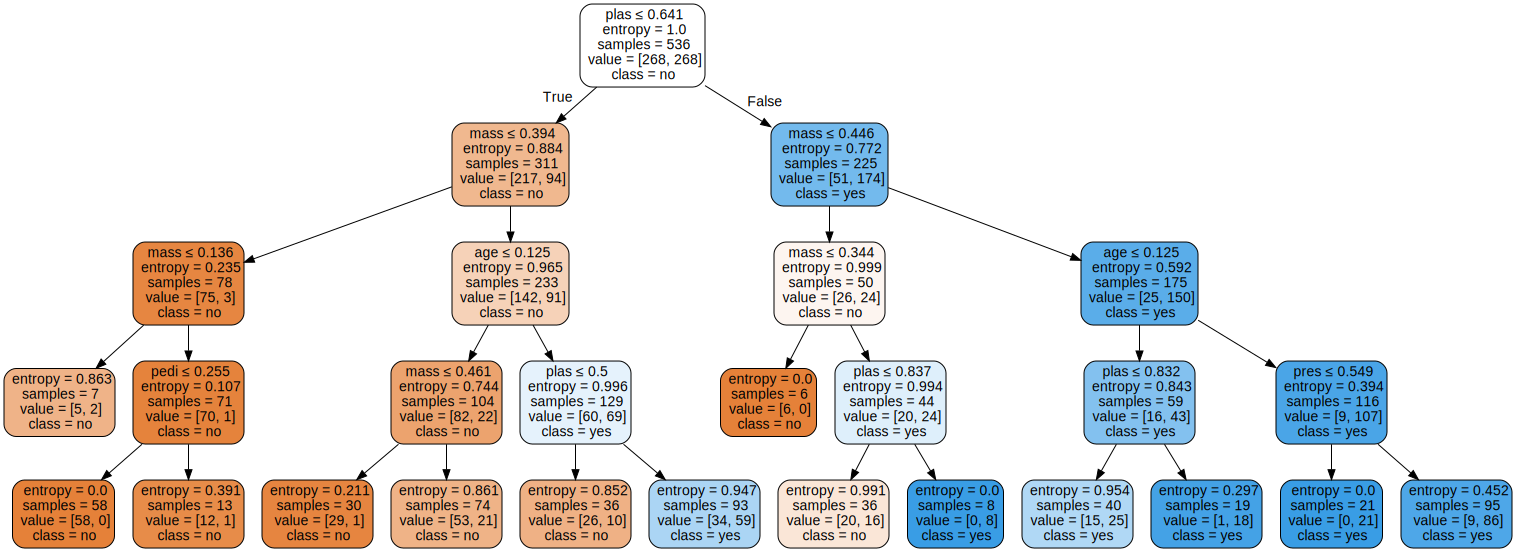

In [ ]:
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
feature_names=feature_names, class_names=['no','yes'], 
 filled=True, rounded=True, 
 special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Use a pruning algorithm to prune the decision tree
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_score)

# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_pred = best_clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(acc_score))
print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy score: 0.83
ccp_alpha: 0.001
Classification report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        99
           1       0.81      0.87      0.84       101

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



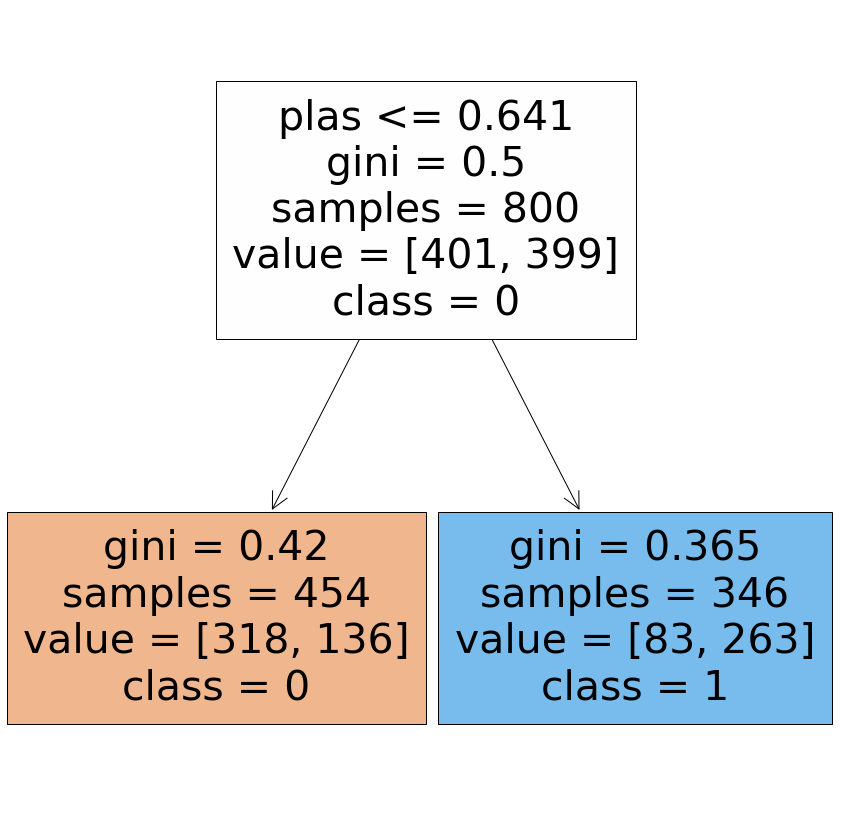

In [ ]:
#Question 9 : Afficher le meilleur arbre obtenu avec la méthode de Pruning 
"""EDIT here"""
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

### Over Sampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth =12, min_samples_split= 50, random_state = 1)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc2)
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification report
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.73      0.79      0.76       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



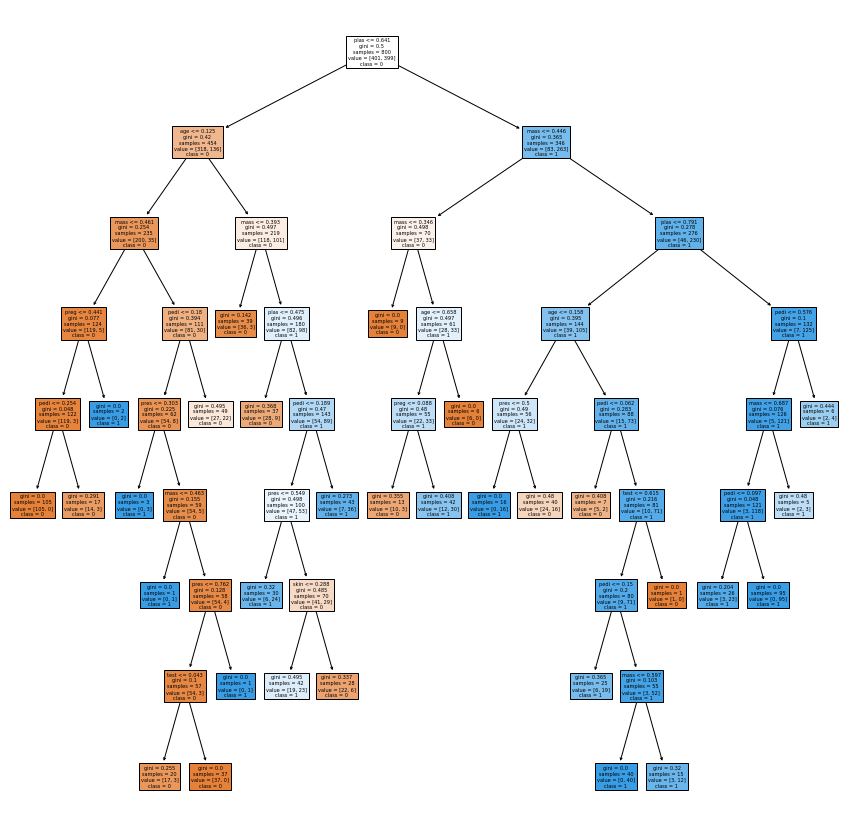

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

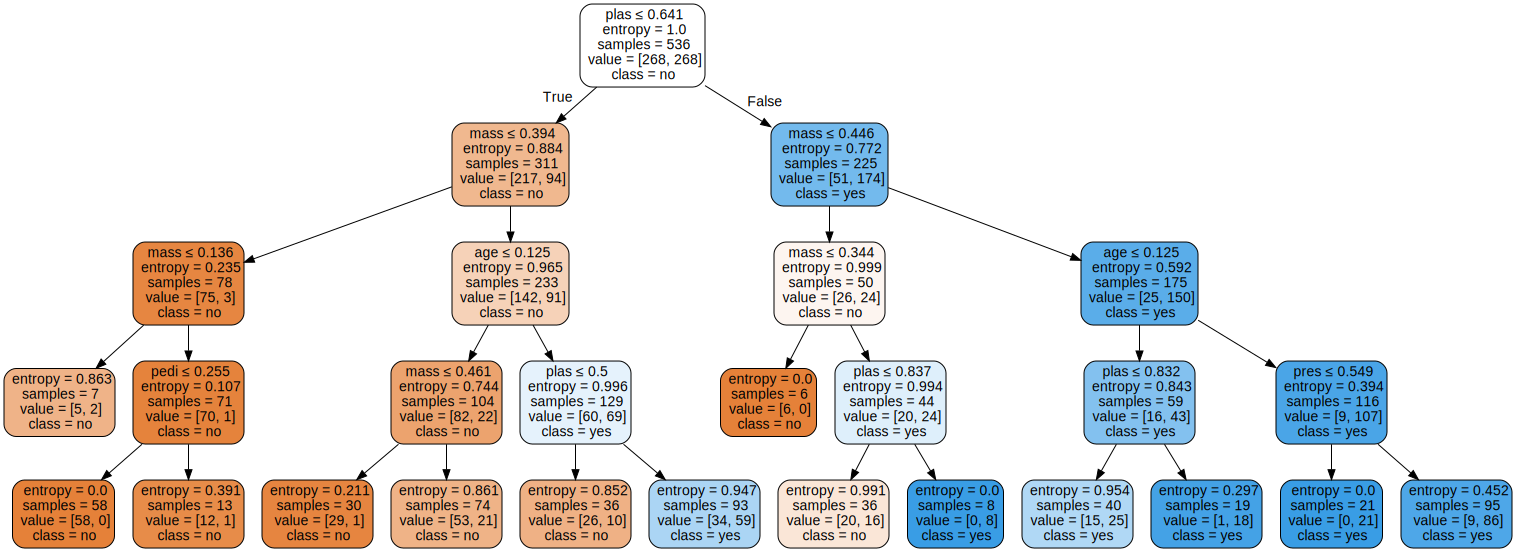

In [ ]:
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
feature_names=feature_names, class_names=['no','yes'], 
 filled=True, rounded=True, 
 special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Use a pruning algorithm to prune the decision tree
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_score)

# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_pred = best_clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(acc_score))
print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy score: 0.83
ccp_alpha: 0.000
Classification report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        99
           1       0.81      0.88      0.84       101

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



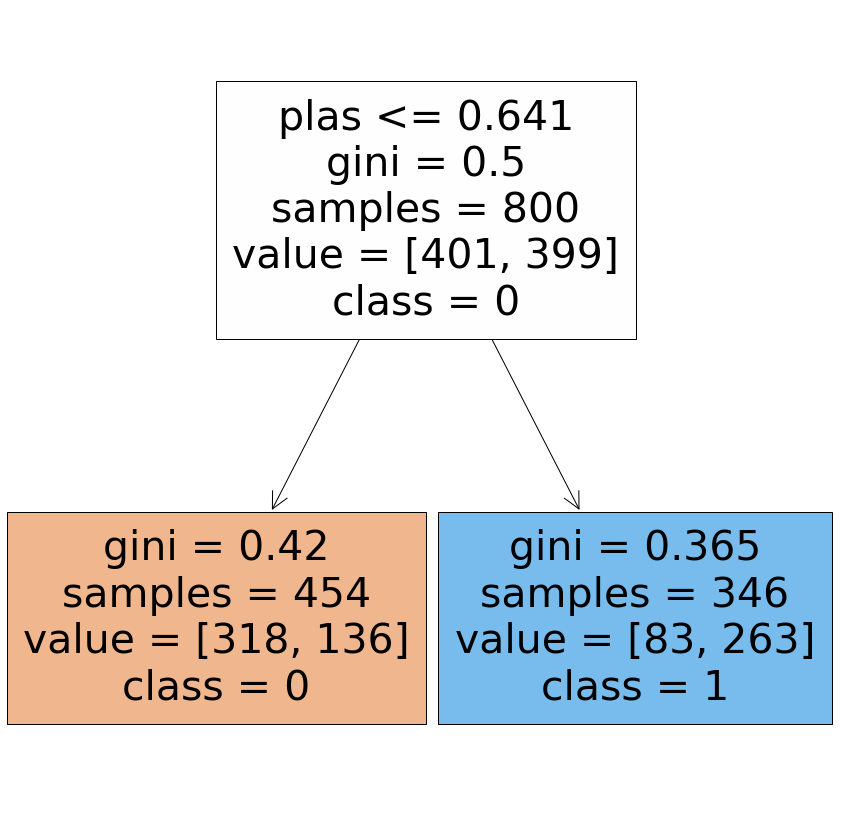

In [ ]:
#Question 9 : Afficher le meilleur arbre obtenu avec la méthode de Pruning 
"""EDIT here"""
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

In [ ]:
#Grid search 
DT = tree.DecisionTreeClassifier(random_state = 12)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DT, params, cv = 10, scoring = 'accuracy')
grid.fit(X2,y2)
y_pred = grid.predict(X_test)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print('Acc:', accuracy_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred))

0.828
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=12)
Acc: 0.945
Classification report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        99
           1       0.95      0.94      0.95       101

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



### SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state = 42)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=7, min_samples_split= 50, random_state=12)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc2)
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy: 0.78
Classification report
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       149
           1       0.75      0.85      0.80       151

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



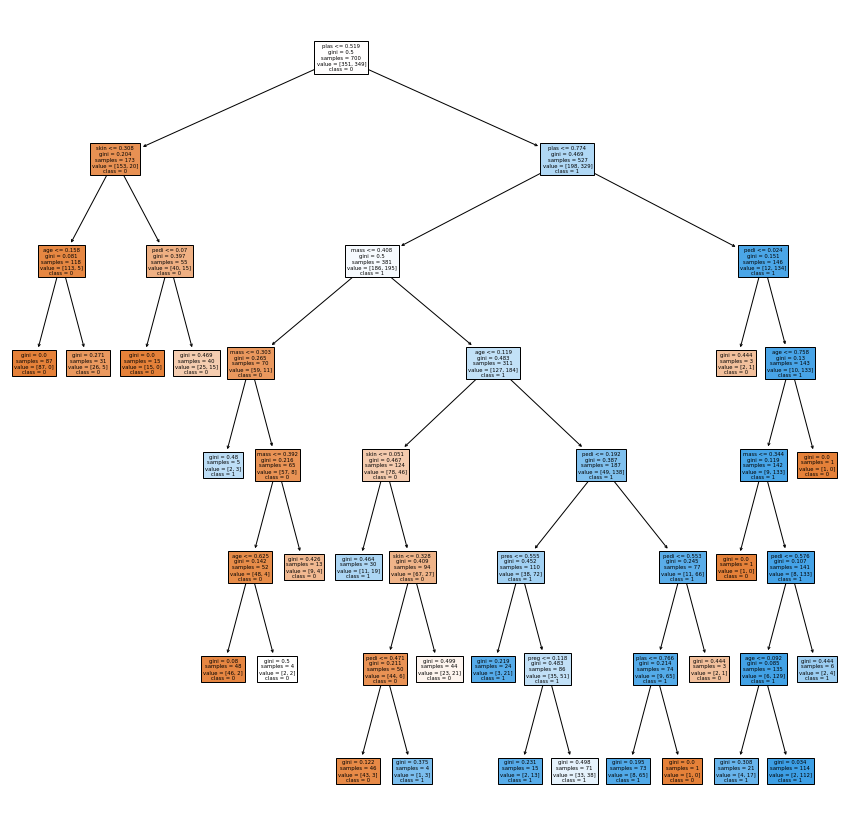

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
 feature_names=feature_names,
 class_names=["0","1"],
 filled=True)

In [ ]:
#Grid search 
DT = tree.DecisionTreeClassifier(random_state=12)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 7, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20, 40],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DT, params, cv = 10, scoring = 'accuracy')
grid.fit(X3,y3)
y_pred = grid.predict(X_test)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print('Acc:', accuracy_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred))

0.776
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=12)
Acc 0.8966666666666666
Classification report
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       149
           1       0.86      0.95      0.90       151

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



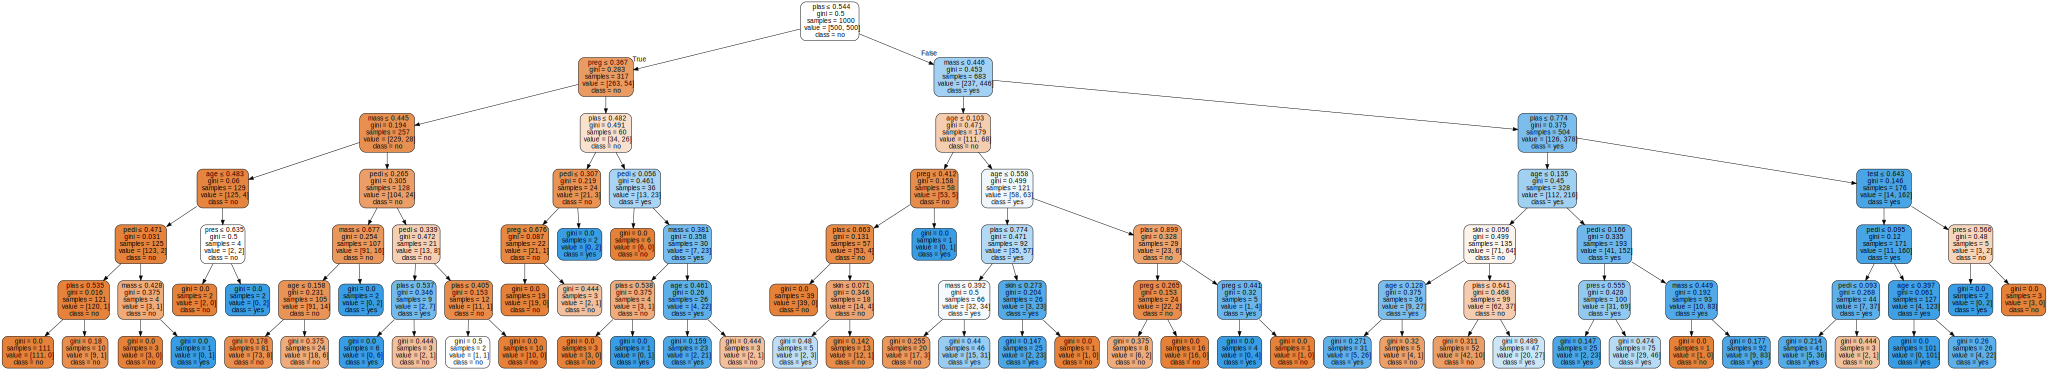

In [ ]:
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
feature_names=feature_names, class_names=['no','yes'], 
 filled=True, rounded=True, 
 special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Use a pruning algorithm to prune the decision tree
clf = tree.DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_score)

# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_pred = best_clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(acc_score))
print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy score: 0.80
ccp_alpha: 0.004
Classification report
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       149
           1       0.77      0.86      0.81       151

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [ ]:
#Grid search 
DT = tree.DecisionTreeClassifier(random_state=42)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DT, params, cv = 10, scoring = 'accuracy')
grid.fit(X3,y3)
y_pred = grid.predict(X_test)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print('Acc:', accuracy_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred))

0.775
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)
Acc: 0.8733333333333333
Classification report
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       149
           1       0.83      0.94      0.88       151

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



# Support Vector Machine

### Under Sampling

In [ ]:
# Mutual Information Classif
X_train, X_test, y_train, y_test = train_test_split(X_new_MIC_1, y1, test_size = 0.2, random_state = 42)

In [ ]:
def svm(X_train, X_test, y_train, y_test):
  svm = SVC()
  svm.fit(X_train, y_train)
  y_pred= svm.predict(X_test)
  acc3= svm.score(X_test, y_test)
  print('Accuracy:', acc3)
  print('Classification report')
  print(classification_report(y_test, y_pred))

svm(X_train, X_test, y_train, y_test)

Accuracy: 0.7777777777777778
Classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        59
           1       0.75      0.78      0.76        49

    accuracy                           0.78       108
   macro avg       0.78      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108



In [ ]:
# grid Search svm
def grid_Search_svm(X_train, X_test, y_train, y_test):
  parametres = {"kernel":['linear','poly','rbf'],"C":[0.1,0.5,1.0,2.0]}
  #classifieur à utiliser
  svmc = SVC()
  #instanciation de la recherche
  grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="accuracy")
  #lancer l'exploration
  resultats = grille.fit(X_train,y_train)
  print(resultats.best_params_)
  print(resultats.best_score_)

In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 0.1, 'kernel': 'poly'}
0.7429822161422709


In [ ]:
# Correlation Coefficient
X_train, X_test, y_train, y_test = train_test_split(X_new_Cor_1, y1, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.7685185185185185
Classification report
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        59
           1       0.71      0.82      0.76        49

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.78      0.77      0.77       108



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 0.5, 'kernel': 'rbf'}
0.7452257181942545


In [ ]:
# Select K best
X_train, X_test, y_train, y_test = train_test_split(X_new_SKB_1, y1, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.7685185185185185
Classification report
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        59
           1       0.71      0.82      0.76        49

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.78      0.77      0.77       108



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 0.5, 'kernel': 'rbf'}
0.7452257181942545


In [ ]:
# SFS
X_train, X_test, y_train, y_test = train_test_split(X_new_SFS_1, y1, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.7685185185185185
Classification report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        59
           1       0.73      0.78      0.75        49

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.77      0.77      0.77       108



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 1.0, 'kernel': 'poly'}
0.7616689466484268


In [ ]:
# EFS
X_train, X_test, y_train, y_test = train_test_split(X_new_EFS_1, y1, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.7777777777777778
Classification report
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        59
           1       0.73      0.82      0.77        49

    accuracy                           0.78       108
   macro avg       0.78      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 0.1, 'kernel': 'rbf'}
0.7544733242134063


### Over Sampling

In [ ]:
# Correlation Coefficient
X_train, X_test, y_train, y_test = train_test_split(X_new_MIC_2, y2, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.73
Classification report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        99
           1       0.75      0.70      0.72       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 1.0, 'kernel': 'rbf'}
0.7625


In [ ]:
# Correlation Coefficient
X_train, X_test, y_train, y_test = train_test_split(X_new_Cor_2, y2, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.755
Classification report
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        99
           1       0.74      0.79      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 1.0, 'kernel': 'rbf'}
0.74875


In [ ]:
# Select K best
X_train, X_test, y_train, y_test = train_test_split(X_new_SKB_2, y2, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.755
Classification report
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        99
           1       0.74      0.79      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 1.0, 'kernel': 'rbf'}
0.74875


In [ ]:
# SFS
X_train, X_test, y_train, y_test = train_test_split(X_new_SFS_2, y2, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.74
Classification report
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        99
           1       0.77      0.69      0.73       101

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 2.0, 'kernel': 'poly'}
0.76375


In [ ]:
# EFS
X_train, X_test, y_train, y_test = train_test_split(X_new_EFS_2, y2, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.735
Classification report
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        99
           1       0.74      0.73      0.74       101

    accuracy                           0.73       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.74      0.73      0.74       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 2.0, 'kernel': 'rbf'}
0.76125


### SMOTE

In [ ]:
# Correlation Coefficient
X_train, X_test, y_train, y_test = train_test_split(X_new_MIC_3, y3, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.78
Classification report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.78      0.79      0.78       101

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 0.5, 'kernel': 'rbf'}
0.77125


In [ ]:
# Correlation Coefficient
X_train, X_test, y_train, y_test = train_test_split(X_new_Cor_3, y3, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.8
Classification report
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.78      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 2.0, 'kernel': 'rbf'}
0.78625


In [ ]:
# Select K best
X_train, X_test, y_train, y_test = train_test_split(X_new_SKB_3, y3, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.785
Classification report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.76      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 1.0, 'kernel': 'rbf'}
0.7825000000000001


In [ ]:
# SFS
X_train, X_test, y_train, y_test = train_test_split(X_new_SFS_3, y3, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.795
Classification report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.77      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 2.0, 'kernel': 'rbf'}
0.7875000000000001


In [ ]:
# EFS
X_train, X_test, y_train, y_test = train_test_split(X_new_EFS_3, y3, test_size = 0.2, random_state = 42)

In [ ]:
svm(X_train, X_test, y_train, y_test)

Accuracy: 0.775
Classification report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        99
           1       0.75      0.83      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



In [ ]:
grid_Search_svm(X_train, X_test, y_train, y_test)

{'C': 0.5, 'kernel': 'rbf'}
0.76875
